In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('ex2data1.txt',names = ['Exam1Score','Exam2Score','Admitted'],header = None)

In [2]:
y = data['Admitted'].values
y=y.reshape(100,1)
X = data[['Exam1Score','Exam2Score']].values

## Plot Data

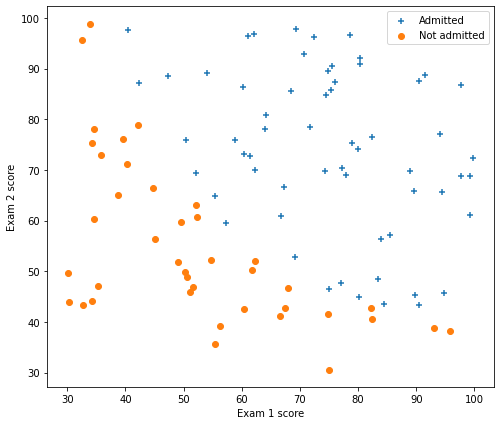

In [3]:
import matplotlib.pyplot as plt

x11 = data[data['Admitted'] == 1]['Exam1Score'].values
x12 = data[data['Admitted'] == 1]['Exam2Score'].values
x21 = data[data['Admitted'] == 0]['Exam1Score'].values
x22 = data[data['Admitted'] == 0]['Exam2Score'].values

plt.figure(figsize = (8,7))
plt.scatter(x11,x12,marker ='+', label = 'Admitted')
plt.scatter(x21,x22,marker ='o', label = "Not admitted")
plt.legend()
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.show()

## Sigmoid Function


In [4]:
def sigmoid(z):
    g = 1/ (1 + np.exp(-z))
    return g

def hypothesis( X,theta):
    
    return sigmoid(np.dot(X,theta))


## Cost Function and Gradient

In [9]:
def costFunction(theta, X, y):
#     theta= theta.reshape(theta.shape[1],theta.shape[0])
    m = len(y)
    J = 0
    grad = np.zeros((theta.shape))
    
    J = 1/m * (np.dot(-y.T,np.log(hypothesis(X,theta.T)))
               - np.dot((1- y).T ,np.log(1- hypothesis(X,theta.T))))
    
    grad = 1/m * np.dot(X.T, (hypothesis(X,theta.T) - y))
    
#   To run the theta Optimization process, make sure to only return cost
    return J.item()

In [7]:
initial_theta = np.zeros((X.shape[1]+1, 1))

X = np.c_[np.ones((X.shape[0],1)),X]

In [8]:
J,grad  = costFunction(initial_theta.reshape(initial_theta.shape[1],initial_theta.shape[0]),X,y)
print("expected Cost with initial theta: 0.693 ")
print("Cost calculated: ", J)
print("expected Gradient at initial theta:\n -0.1000\n -12.0092\n -11.2628\n")
print("calculated theta: \n",grad)


expected Cost with initial theta: 0.693 
Cost calculated:  0.6931471805599452
expected Gradient at initial theta:
 -0.1000
 -12.0092
 -11.2628

calculated theta: 
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


## Optimizing 

In [10]:
from scipy.optimize import minimize

# instead of using fminunc in Octave, use minimize in scipy to get the optimal theta
res  = minimize(costFunction,
                initial_theta,
                args =(X,y),
                method = 'Nelder-Mead',
                options ={'disp' :True})

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [11]:
print("the expected theta: -25.161, 0.206, 0.201")
print('calculated theta: ',res.x)

the expected theta: -25.161, 0.206, 0.201
calculated theta:  [-25.16130062   0.20623142   0.20147143]


## Plotting Decision Boundary

In [12]:
min1 = X[(X[:,1] + X[:,2]).argmin(),:][1:]
max1 = X[(X[:,1] + X[:,2]).argmax(),:][1:]
y = (-1/ res.x[2]) * (res.x[1] * np.array([min1, max1]) + res.x[0])

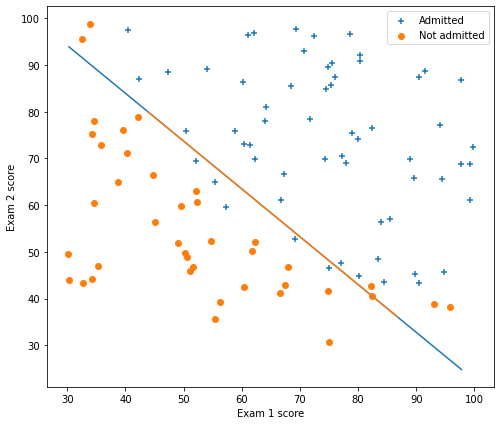

In [13]:
plt.figure(figsize = (8,7))

plt.scatter(x11,x12,marker ='+', label = 'Admitted')
plt.scatter(x21,x22,marker ='o', label = "Not admitted")
plt.plot(np.array([min1, max1]), y )
plt.legend()
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.show()

In [14]:
print("Predict probability for a student with score 45 on exam 1 and score 85 on exam 2 : %0.3f" % hypothesis([1, 45, 85] , res.x))
print('Expected value: 0.775 +/- 0.002\n\n')

Predict probability for a student with score 45 on exam 1 and score 85 on exam 2 : 0.776
Expected value: 0.775 +/- 0.002




## Regularized Logistic Regression

In [15]:
data2 = pd.read_csv('ex2data2.txt',
                     names = ['MicrochipTest1','MicrochipTest2','y'],
                     header = None)

X = data2[['MicrochipTest1','MicrochipTest2']].values
y = data2['y'].values

## Visualizing the Data

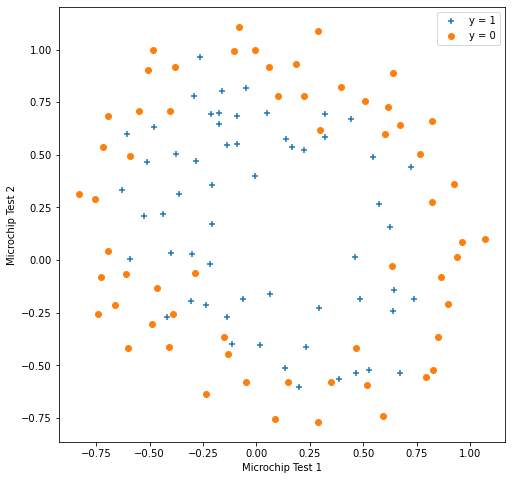

In [16]:
plt.figure(figsize = (8,8))
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

x11, x12 = data2[data2['y'] == 1]['MicrochipTest1'].values, data2[data2['y'] == 1]['MicrochipTest2'].values
x21, x22 = data2[data2['y'] == 0]['MicrochipTest1'].values, data2[data2['y'] == 0]['MicrochipTest2'].values
plt.scatter(x11,x12, marker = '+', label = 'y = 1')
plt.scatter(x21,x22, marker = 'o', label = 'y = 0')

plt.legend()

## Feature Mapping

In [17]:
def mapFeature(x1,x2):
    degree = 6
    out = np.ones(x1.shape[0])
    
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            
            out =  np.c_[ out, (x1 ** (i - j)) * (x2 ** j)]
            
    return out

In [18]:
X = mapFeature(X[:,0],X[:,1])

In [19]:
initial_theta = np.zeros((X.shape[1], 1))
lambd = 1

## Cost Function and Gradient

In [22]:
def costFunctionReg(theta, X, y, lambd):
    m = len(y)
    J = 0
    grad = np.zeros(theta.shape)
    
    J = 1/m * (np.dot (-y, np.log(hypothesis( X,theta))) - 
               np.dot((1-y),np.log(1 - hypothesis( X,theta)) )) + lambd / (2*m) * sum(theta ** 2)
   
    grad = 1/m * np.dot(X.T, (hypothesis(X,theta) - y.reshape(y.shape[0],1))) 
#    To optimize the theta, remove gradient from return of the cost function to avoid error during plotting 
    return J

In [21]:
j, grads = costFunctionReg(initial_theta, X, y, lambd)
print("Expected Cost: 0.693, Calculated Cost: "
      ,j.item())
print("first five expected gradients: \n 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115 \n")
print("calculated Gradients: \n" ,grads[0:5])

Expected Cost: 0.693, Calculated Cost:  0.6931471805599453
first five expected gradients: 
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115 

calculated Gradients: 
 [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


## Regularization and Accuracies

In [23]:
initial_theta = np.zeros((X.shape[1],1))
lambd = 1
res  = minimize(costFunctionReg,
                initial_theta,
                args =(X,y,lambd ),
                method = 'Nelder-Mead',
                options ={'disp' :True})


In [24]:
print("Optimized theta: \n",res.x)

Optimized theta: 
 [ 0.61870732  0.07701867  0.28851361 -1.89936773  0.34761862 -0.30231806
  0.332937    0.25065888 -0.17142429 -0.32070029 -0.40478574  0.26571941
  0.93941002 -0.95593802 -0.61607659 -0.18119003 -0.14133768 -0.15458562
 -0.34753154  0.51293072  0.22416108 -0.03674151  0.74630368  0.11406644
  0.295022    0.03664998  0.47567136 -0.86148986]


In [25]:
u = np.arange(-1,1.5, 0.051020)
u = u.reshape(1,u.shape[0])
v = np.arange(-1,1.5, 0.051020)
v = v.reshape(1,v.shape[0])

z = np.zeros((u.shape[1], v.shape[1]))

In [26]:
for i in range(0,u.shape[1]):
    for j in range(0, v.shape[1]):
        z[i,j] = np.dot(mapFeature(u[:,i],v[:,j]),res.x)

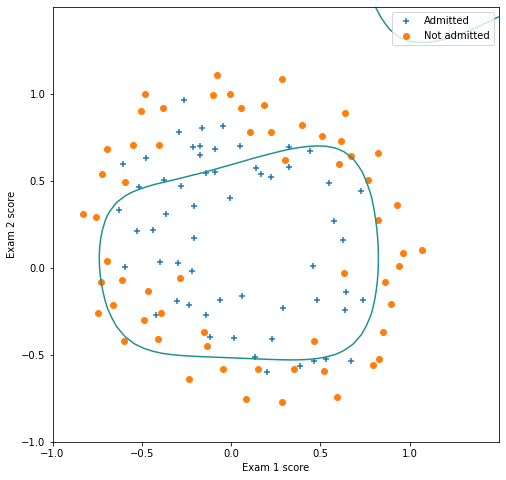

In [27]:

u = np.arange(-1,1.5, 0.051020)
v = np.arange(-1,1.5, 0.051020)

plt.figure(figsize = (8,8))

plt.scatter(x11,x12,marker ='+', label = 'Admitted')
plt.scatter(x21,x22,marker ='o', label = "Not admitted")
plt.contour(v,u,z, levels = 0)
plt.legend()
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X, y)
predicted = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted)

In [29]:
print("expected Accuracy : 83.1")
print("calculatd accuracy: %0.1f" %( accuracy*100))

expected Accuracy : 83.1
calculatd accuracy: 83.1
